# Data manipulation with Pandas.

### Import libraries and loading the data
The database is a list of 10000 entries about fast food restaurants in the USA and their location. [Source of the database](https://www.kaggle.com/datafiniti/fast-food-restaurants/version/2)

In [1]:
# Import libraries
import pandas as pd
from matplotlib import pyplot as plt
# Loading the dataset
url = 'https://raw.githubusercontent.com/ricardopretelt/Intro-to-python-libraries/master/Datafiniti_Fast_Food_Restaurants.csv'
df = pd.read_csv(url)
# To learn about the dataset we are going to analyze.
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
id             10000 non-null object
dateAdded      10000 non-null object
dateUpdated    10000 non-null object
address        10000 non-null object
categories     10000 non-null object
city           10000 non-null object
country        10000 non-null object
keys           10000 non-null object
latitude       10000 non-null float64
longitude      10000 non-null float64
name           10000 non-null object
postalCode     10000 non-null object
province       10000 non-null object
sourceURLs     10000 non-null object
websites       10000 non-null object
dtypes: float64(2), object(13)
memory usage: 1.1+ MB
None


In [2]:
# To see the first 5 rows of data
df.head()

,id,dateAdded,dateUpdated,address,categories,city,country,keys,latitude,longitude,name,postalCode,province,sourceURLs,websites
0,AVwcmSyZIN2L1WUfmxyw,2015-10-19T23:47:58Z,2018-06-26T03:00:14Z,800 N Canal Blvd,American Restaurant and Fast Food Restaurant,Thibodaux,US,us/la/thibodaux/800ncanalblvd/1780593795,29.814697,-90.814742,SONIC Drive In,70301,LA,https://foursquare.com/v/sonic-drive-in/4b7361...,https://locations.sonicdrivein.com/la/thibodau...
1,AVwcmSyZIN2L1WUfmxyw,2015-10-19T23:47:58Z,2018-06-26T03:00:14Z,800 N Canal Blvd,Fast Food Restaurants,Thibodaux,US,us/la/thibodaux/800ncanalblvd/1780593795,29.814697,-90.814742,SONIC Drive In,70301,LA,https://foursquare.com/v/sonic-drive-in/4b7361...,https://locations.sonicdrivein.com/la/thibodau...
2,AVwcopQoByjofQCxgfVa,2016-03-29T05:06:36Z,2018-06-26T02:59:52Z,206 Wears Valley Rd,Fast Food Restaurant,Pigeon Forge,US,us/tn/pigeonforge/206wearsvalleyrd/-864103396,35.803788,-83.580553,Taco Bell,37863,TN,https://www.yellowpages.com/pigeon-forge-tn/mi...,"http://www.tacobell.com,https://locations.taco..."
3,AVweXN5RByjofQCxxilK,2017-01-03T07:46:11Z,2018-06-26T02:59:51Z,3652 Parkway,Fast Food,Pigeon Forge,US,us/tn/pigeonforge/3652parkway/93075755,35.782339,-83.551408,Arby's,37863,TN,http://www.yellowbook.com/profile/arbys_163389...,"http://www.arbys.com,https://locations.arbys.c..."
4,AWQ6MUvo3-Khe5l_j3SG,2018-06-26T02:59:43Z,2018-06-26T02:59:43Z,2118 Mt Zion Parkway,Fast Food Restaurant,Morrow,US,us/ga/morrow/2118mtzionparkway/1305117222,33.562738,-84.321143,Steak 'n Shake,30260,GA,https://foursquare.com/v/steak-n-shake/4bcf77a...,http://www.steaknshake.com/locations/23851-ste...


In [3]:
# To print a query filtering just all the mcdonalds in New York
df[(df.name == "McDonald's") & (df.city == "New York")]

,id,dateAdded,dateUpdated,address,categories,city,country,keys,latitude,longitude,name,postalCode,province,sourceURLs,websites
27,AVzA1QA5-gnIPe8DScbz,2017-06-19T14:50:03Z,2018-06-25T09:29:44Z,1188 Avenue of The Americas,Fast Food Restaurant,New York,US,us/ny/newyork/1188avenueoftheamericas/-1161002137,40.757558,-73.981671,McDonald's,10036,NY,https://www.trip.com/new-york-city/restaurants...,http://mcdonalds.com/
28,AVzA2BSFFcQ3k02bBX5D,2017-06-19T14:53:25Z,2018-06-25T09:29:43Z,114 Delancey St,Fast Food Restaurant,New York,US,us/ny/newyork/114delanceyst/-1161002137,40.718943,-73.988306,McDonald's,10002,NY,https://www.allmenus.com/ny/new-york/188808-mc...,http://mcdonalds.com
2000,AV1TsAxALD2H7whiaMY6,2017-07-18T03:13:52Z,2018-06-17T23:19:47Z,317 Broadway,Fast Food,New York,US,us/ny/newyork/317broadway/-1161002137,40.715763,-74.005342,McDonald's,10007,NY,https://www.trip.com/new-york-city/restaurants...,http://mcdonalds.com/
2007,AVzA3iyrLD2H7whiWGjX,2017-06-19T15:00:04Z,2018-06-17T23:19:44Z,262 Canal St,Fast Food,New York,US,us/ny/newyork/262canalst/-1161002137,40.718510,-74.001157,McDonald's,10013,NY,https://foursquare.com/v/mcdonalds/4f7f47b1754...,"http://mcdonalds.com,http://www.mcdonalds.com/..."
2098,AVzkJqOoFcQ3k02bCprc,2017-06-26T11:25:56Z,2018-06-17T23:16:46Z,1997 3rd Ave,Fast Food,New York,US,us/ny/newyork/19973rdave/-1161002137,40.793822,-73.942653,McDonald's,10029,NY,https://www.trip.com/new-york-city/restaurants...,"http://mcdonalds.com,https://www.mcdonalds.com..."
2100,AVzX73qtLD2H7whiWxVO,2017-06-24T02:30:14Z,2018-06-17T23:16:43Z,18 E 42nd St,Fast Food Restaurant,New York,US,us/ny/newyork/18e42ndst/-1161002137,40.752943,-73.980356,McDonald's,10017,NY,https://www.allmenus.com/ny/new-york/188919-mc...,"http://mcdonalds.com,http://mcdonalds.com/"
2106,AVzA1yDALD2H7whiWFmS,2017-06-19T14:52:23Z,2018-06-17T23:16:41Z,136 W 3rd St,Fast Food Restaurant,New York,US,us/ny/newyork/136w3rdst/-1161002137,40.730757,-74.001115,McDonald's,10012,NY,https://foursquare.com/v/mcdonalds/4b777562f96...,"http://mcdonalds.com,http://mcdonalds.com/"
2107,AVzA_xvzLD2H7whiWJCW,2017-06-19T15:36:03Z,2018-06-17T23:16:41Z,1651 Broadway,Fast Food Restaurant,New York,US,us/ny/newyork/1651broadway/-1161002137,40.762606,-73.983729,McDonald's,10019,NY,https://www.trip.com/new-york-city/restaurants...,http://www.mcdonalds.com/
8874,AV1TsA5ZLD2H7whiaMZr,2017-07-18T03:13:53Z,2018-04-19T16:23:44Z,966 3rd Ave,Fast Food,New York,US,us/ny/newyork/9663rdave/-1161002137,40.760879,-73.967473,McDonald's,10022,NY,https://www.trip.com/new-york-city/restaurants...,"https://www.mcdonalds.com/us/en-us.html,http:/..."
9464,AVzA1nTnLD2H7whiWFbr,2017-06-19T14:51:39Z,2018-04-15T19:03:51Z,336 E 23rd St,Fast Food Restaurant,New York,US,us/ny/newyork/336e23rdst/-1161002137,40.737024,-73.979477,McDonald's,10010,NY,https://foursquare.com/v/mcdonalds/4b133991f96...,"http://mcdonalds.com,https://www.mcdonalds.com..."


In [4]:
#To select only the columns of interest
New_df=df[['address', 'city', 'name', 'province']]
New_df.head()

,address,city,name,province
0,800 N Canal Blvd,Thibodaux,SONIC Drive In,LA
1,800 N Canal Blvd,Thibodaux,SONIC Drive In,LA
2,206 Wears Valley Rd,Pigeon Forge,Taco Bell,TN
3,3652 Parkway,Pigeon Forge,Arby's,TN
4,2118 Mt Zion Parkway,Morrow,Steak 'n Shake,GA


In [5]:
# We want to know how many cities are on the list
print(df.province.unique())

['LA' 'TN' 'GA' 'MI' 'CA' 'NY' 'TX' 'OH' 'SC' 'MS' 'IN' 'MA' 'FL' 'MO'
 'PA' 'IL' 'CT' 'KY' 'KS' 'IA' 'HI' 'ID' 'NC' 'DE' 'AZ' 'WI' 'CO' 'AR'
 'SD' 'WV' 'WY' 'VA' 'OR' 'MD' 'WA' 'UT' 'NV' 'OK' 'ME' 'ND' 'NH' 'VT'
 'NJ' 'NE' 'MN' 'MT' 'AL' 'NM' 'AK' 'RI']


In [6]:
#We want to know the number of restaurants by name
Restaurant_count = df.groupby('name').city.count().reset_index()
print(Restaurant_count)

                                        name  city
0                                   7-Eleven    19
1                        90 Miles Cuban Cafe     1
2                      A&W/Long John Silvers     1
3                            A's Ace Burgers     1
4                              Abruzzi Pizza     1
5                      Acropolis Gyro Palace     1
6                        Adobe Cantina Salsa     1
7                                  Ak Buffet     1
8                           All About Burger     1
9                        Ameci Pizza & Pasta     1
10                     Andy's Frozen Custard     3
11                          Angelina's Pizza     1
12                             Ani's Chicken     1
13                                    Arby's   663
14                           Arby's - Closed     3
15                                     Arbys     3
16                             Arctic Circle     4
17                     Arni's Crawfordsville     1
18            Arthur Treacher's

In [7]:
# Sorting values from max to min
Result= Restaurant_count.sort_values('city',ascending=False)
print(Result)

                                                name  city
331                                       McDonald's  1898
496                                        Taco Bell  1032
75                                       Burger King   833
488                                           Subway   776
13                                            Arby's   663
547                                          Wendy's   628
256                                  Jack in the Box   330
397                                        Pizza Hut   230
147                                      Dairy Queen   218
155                                   Domino's Pizza   215
109                                      Chick-fil-A   206
278                                              KFC   162
447                                   SONIC Drive In   125
269                                     Jimmy John's   119
93                                        Carl's Jr.   112
232                                         Hardee's    

In [8]:
The_top=Result[Result.city>300]
print(The_top)

                name  city
331       McDonald's  1898
496        Taco Bell  1032
75       Burger King   833
488           Subway   776
13            Arby's   663
547          Wendy's   628
256  Jack in the Box   330


/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


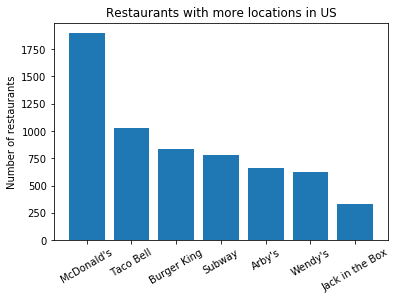

In [9]:
#To graph
Top_Restaurants=The_top.name
Number=The_top.city
plt.bar(range(len(Top_Restaurants)),Number)
ax=plt.subplot()
ax.set_xticks(range(len(Top_Restaurants)))
ax.set_xticklabels(Top_Restaurants, rotation=30)
plt.ylabel('Number of restaurants')
plt.title('Restaurants with more locations in US')
plt.show()